In [20]:
import numpy as np
from numpy import pi
from math import dist
from ripser import ripser
from persim import plot_diagrams
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances

import matplotlib.pyplot as plt
%matplotlib inline
import math

In [9]:
isoms = generate_c2_isoms(1000, 3, 3)

M = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        M[i][j] = distance_C2(isoms[i], isoms[j],3,3)

NameError: name 'generate_c2_isoms' is not defined

In [ ]:
output = ripser(M, maxdim = 1, coeff = 2, distance_matrix = True)
plot_dgms(output)

In [10]:
persistent_H1_intervals(output)

NameError: name 'persistent_H1_intervals' is not defined

In [11]:
output = ripser(M, maxdim = 1, coeff = 3, distance_matrix = True)
plot_dgms(output)

NameError: name 'M' is not defined

In [12]:
persistent_H1_intervals(output)

NameError: name 'persistent_H1_intervals' is not defined

# C3

In [13]:
def distance_C3_correct(x, y, a):
    
   # no translation in rotation axis
    Y = [y] # no translation in any axis
    for i in [1,-1]:
        Y.append((y[0], y[1]+ i * (3**0.5) * a, y[2])) # front and back
        Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
        Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
        
    # rotate by 2pi/3
    Y.append((-1/2 * y[0] - (3**0.5)/2 * y[1], -1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + 2*pi/3)) # only rotation by 2pi/3
    for i in [1,-1]:
        y1 = -1/2 * y[0] - (3**0.5)/2 * y[1]
        y2 = -1/2 * y[1] + (3**0.5)/2 * y[0] 
        Y.append((y1, y2 + i * (3**0.5) * a, y[2] + 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
    
    # rotate by -2pi/3
    Y.append((-1/2 * y[0] + (3**0.5)/2 * y[1], -1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - 2*pi/3)) # only rotation by -2pi/3
    for i in [1,-1]:
        y1 = -1/2 * y[0]+ (3**0.5)/2 * y[1]
        y2 = -1/2 * y[1] - (3**0.5)/2 * y[0]
        Y.append((y1, y2 + i * (3**0.5) * a, y[2] - 2*pi/3)) # front and back
        Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
        Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
    
    distances = []
    for y_new in Y: 
        distances.append(dist(x,y_new))
        
    return min(distances)

In [14]:
def distance_C3_metric(a):
    def wrapped(x,y):
            # no translation in rotation axis
        Y = [y] # no translation in any axis
        for i in [1,-1]:
            Y.append((y[0], y[1]+ i * (3**0.5) * a, y[2])) # front and back
            Y.append((y[0] + i * (3/2) * a, y[1] - (3**0.5)/2 * a, y[2])) # LB and RF
            Y.append((y[0] + i * (3/2) * a, y[1] + (3**0.5)/2 * a, y[2])) # LF and RB
            
        # rotate by 2pi/3
        Y.append((-1/2 * y[0] - (3**0.5)/2 * y[1], -1/2 * y[1] + (3**0.5)/2 * y[0], y[2] + 2*pi/3)) # only rotation by 2pi/3
        for i in [1,-1]:
            y1 = -1/2 * y[0] - (3**0.5)/2 * y[1]
            y2 = -1/2 * y[1] + (3**0.5)/2 * y[0] 
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] + 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] + 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] + 2*pi/3)) # LF and RB    
        
        # rotate by -2pi/3
        Y.append((-1/2 * y[0] + (3**0.5)/2 * y[1], -1/2 * y[1] - (3**0.5)/2 * y[0], y[2] - 2*pi/3)) # only rotation by -2pi/3
        for i in [1,-1]:
            y1 = -1/2 * y[0]+ (3**0.5)/2 * y[1]
            y2 = -1/2 * y[1] - (3**0.5)/2 * y[0]
            Y.append((y1, y2 + i * (3**0.5) * a, y[2] - 2*pi/3)) # front and back
            Y.append((y1 + i * (3/2) * a, y2 - (3**0.5)/2 * a, y[2] - 2*pi/3)) # LB and RF
            Y.append((y1 + i * (3/2) * a, y2 + (3**0.5)/2 * a, y[2] - 2*pi/3)) # LF and RB   
        
        distances = []
        for y_new in Y: 
            distances.append(math.dist(x,y_new))
            
        return min(distances)
        
    return(wrapped)

In [15]:
# j should be divisible by 4
def march_c3_isoms(j = 1000, a = 1):
    j = math.ceil(j / 4)
    isoms = []
    tri = (math.sqrt(3) / 2)
    steps = np.linspace(0, a, j)
    
    for elem in steps:
        isoms.append((elem * 1.5 , -tri * elem, 0))    

    for elem in steps:
        isoms.append((a/2 + elem * 1.5, tri * elem - tri * a, 0))
        
    rotation = np.linspace(0, (2 * math.pi / 3), j)
    for elem in rotation:
        isoms.append((0, 0, elem))
    for elem in rotation:
        isoms.append((a / 2, -tri * a, elem))
        
    return isoms

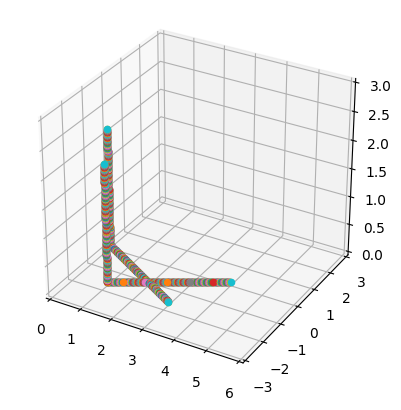

In [16]:
isoms2 = march_c3_isoms(1000, 2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.axis('square')
plt.xlim(0, 6)
plt.ylim(-3, 3)
ax.set_zlim(0,3)
for isom in isoms2:
    ax.scatter(isom[0], isom[1], isom[2], marker='o')

plt.show()

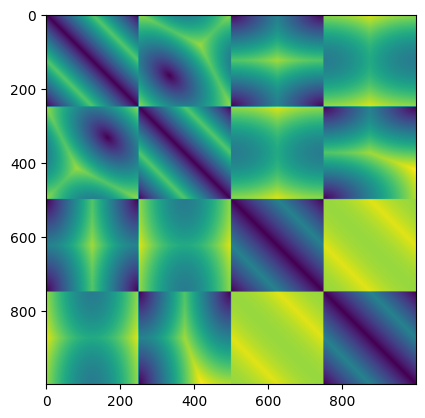

In [17]:
march = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        march[i][j] = distance_C3_correct(isoms2[i], isoms2[j],2)
plt.figure()
plt.imshow(march)
plt.show()

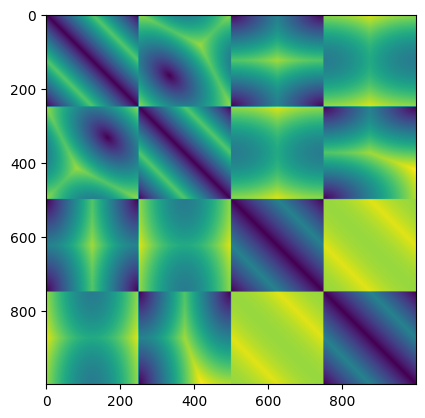

In [19]:
B = pairwise_distances(isoms2, metric = distance_C3_metric(2), n_jobs = -1)
plt.figure()
plt.imshow(B)
plt.show()

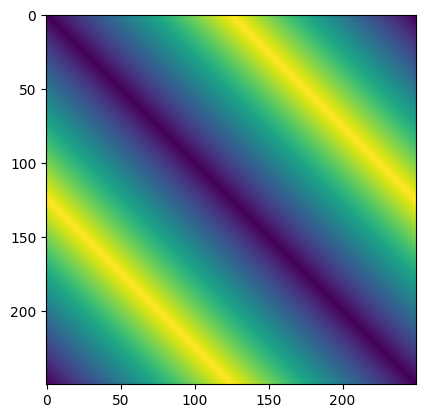

In [101]:
plt.figure()
plt.imshow(march[0:250,:250])
plt.show()

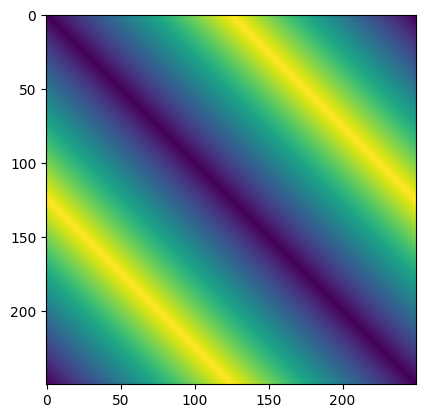

In [102]:
plt.figure()
plt.imshow(march[250:500,250:500])
plt.show()

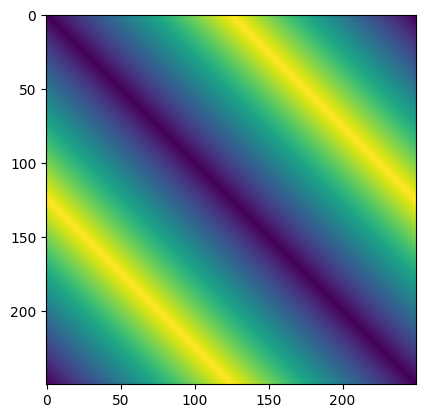

In [103]:
plt.figure()
plt.imshow(march[500:750,500:750])
plt.show()

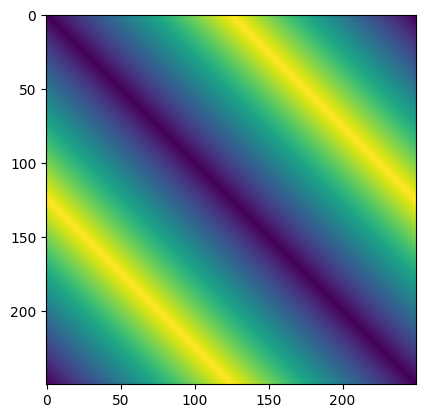

In [104]:
plt.figure()
plt.imshow(march[750:,750:])
plt.show()